In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Slope and Intercept

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
def standard_units(x):
    return (x - np.average(x)) / np.std(x)

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

# Galton height data

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [4]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns('MidParent', galton.column('midparentHeight'),'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [5]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where('MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

In [10]:
heights_with_predictions = heights.with_column('Average neighbor prediction', 
                                               heights.apply(nn_prediction_galton, 'MidParent'))
heights_with_predictions

MidParent,Child,Average neighbor prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


## Calculate slope & intercept

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [11]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.637360896969479, 22.63624054958975)

## Make prediction for child height

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [9]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Average neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [12]:
heights_with_predictions = heights_with_predictions.with_column('Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept)
heights_with_predictions

MidParent,Child,Average neighbor prediction,Regression Prediction
75.43,73.2,70.1,70.7124
75.43,69.2,70.1,70.7124
75.43,69,70.1,70.7124
75.43,69,70.1,70.7124
73.66,73.5,70.4158,69.5842
73.66,72.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
73.66,65.5,70.4158,69.5842
72.06,71,68.5025,68.5645
72.06,68,68.5025,68.5645


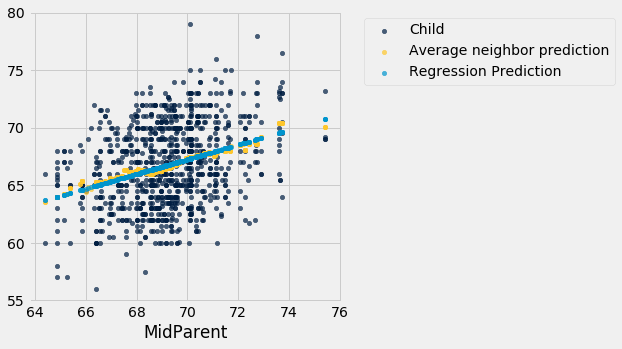

In [13]:
heights_with_predictions.scatter('MidParent')